In [7]:
import  matplotlib.pyplot as plt
import numpy as np
import parse_active
import random
import math
import os, sys
import to_go_faster as tgf
import tools
import time

mutag_labels = ["C", "O", "Cl", "H", "N", "F", "Br", "S", "P", "I", "Na", "K", "Li", "Ca"]


In [11]:
rule = "23"
cls = 0
alpha = 0.90
a = "90"

In [17]:
path_to_active_egos = "../activ_ego/mutag_23labels_egos.txt"
graphs_cls, means_number_of_nodes = parse_active.build_graphs_from_file(path_to_active_egos)
graphs = graphs_cls[cls]

Mean size of graphs: [9.14756447 9.59137056]


In [29]:
path_to_distances_matrix = "../../distances_matrix/"
distances_matrix = tgf.load_matrix_from_txt(path_to_distances_matrix, rule, cls)
real_median_index = np.argmin(np.mean(distances_matrix, axis=0))

In [37]:
def show_graph(i):
        distance_to_median = distances_matrix[i, real_median_index]
        tools.show_graph(tools.relabel_graph_to_mutag(graphs[i].nx_graph, mutag_labels), name="graph_" + str(i), layout="kamada_kawai", title="graph_" + str(i) + "\n Distance to the real median: " + str(distance_to_median), save=False)

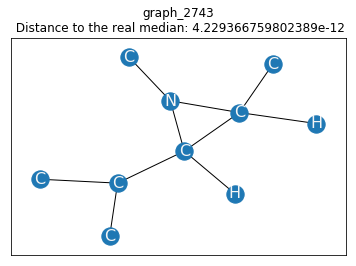

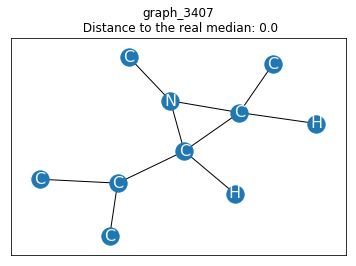

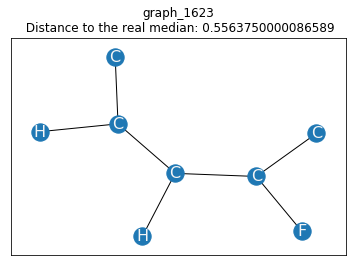

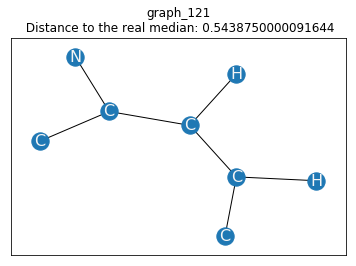

In [41]:
show_graph(2743)
show_graph(3407)
show_graph(1623)
show_graph(121)

In [ ]:
path_to_log = "./log/" # complete the path
suffix= "_1"
extension = ".txt.gz"
specific_name= "r" + rule + "_a" + a + suffix + extension

In [ ]:
selected_graph = np.loadtxt(path_to_log + "selected_graphs_index_"  + specific_name)
distances_to_real_median = np.loadtxt(path_to_log + "distances_to_real_median_" + specific_name)
computation_time = np.loadtxt(path_to_log + "computation_time_" + specific_name)
distances_to_mean = np.loadtxt(path_to_log + "distances_to_mean_" + specific_name)
median_over_iterations = np.loadtxt(path_to_log + "median_over_iterations_" + specific_name)

In [ ]:
def show_plot(dist_real_median, comp_time, dist_mean, born_inf=0, borne_sup=len(graphs)):
        x = np.arange(born_inf, borne_sup)
        fig, ax1 = plt.subplots()
        color = 'tab:blue'
        ax1.set_xlabel('Iteration')
        ax1.set_ylabel('Distance to the real median', color=color)
        ax1.plot(x,distances_to_real_median, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'tab:red'
        ax2.set_ylabel('Computation time', color=color)  # we already handled the x-label with ax1
        ax2.plot(x,computation_time, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'tab:green'
        ax3.set_ylabel('Distance to the mean', color=color)  # we already handled the x-label with ax1
        ax3.plot(x,distances_to_mean, color=color)
        ax3.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        plt.show()

        plt.plot(x,distances_to_real_median, 'blue')
        plt.show()

        plt.plot(x,computation_time, 'red')
        plt.show()

        plt.plot(x,distances_to_mean, 'green')
        plt.show()